# SVM  with PCA

In [8]:
#importing important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
# importing dataset
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
# first ten rows from the dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [11]:
# checking data type of each column
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
# describing the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# print data shape
df.shape

(303, 14)

In [14]:
# print data size of the data
df.size

4242

In [15]:
# Complete information of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [16]:
# To find the sum of missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
#count the number of patients who have heart disease
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

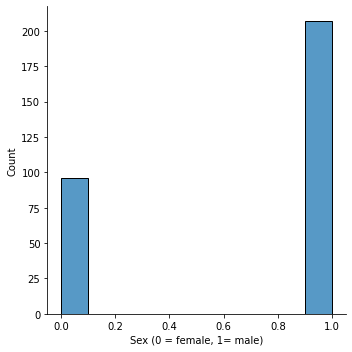

In [147]:
# classify target variable between male and female and visualize the result
sns.displot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

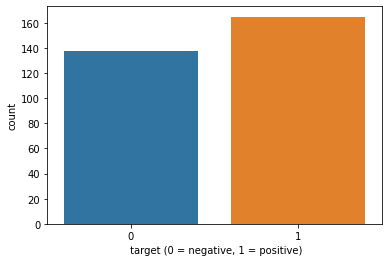

In [18]:
#count visualization
sns.countplot(x="target", data=df)
plt.xlabel(" target (0 = negative, 1 = positive)")
plt.show()

# Data prepocessing

In [19]:
#extracting x and y from the data
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print('Dimentionality of x is : ', x.shape)
print('Dimentionality of y is : ', y.shape)

Dimentionality of x is :  (303, 13)
Dimentionality of y is :  (303,)


In [20]:
# Applying Standardscaling
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [21]:
# applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [22]:
# Final DF
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,0.624111,2.321270,1
1,-0.455988,-0.957351,1
2,-1.828805,0.042885,1
3,-1.716006,-0.495337,1
4,-0.371356,0.301156,1


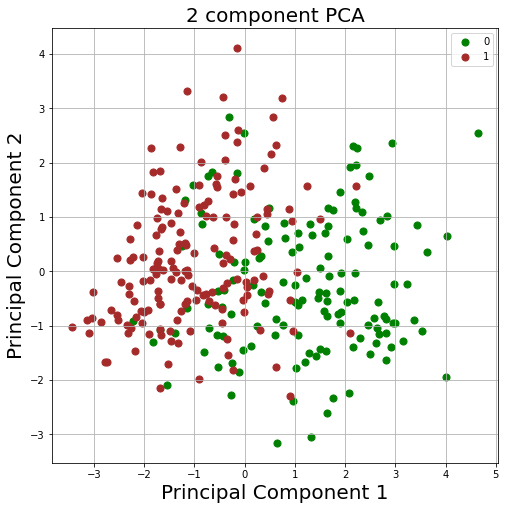

In [23]:
# Visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 20)
ax.set_ylabel('Principal Component 2', fontsize = 20)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['green', 'brown']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [24]:
# Variance
pca.explained_variance_ratio_

array([0.21254053, 0.11820708])

# SVM 

In [25]:
# performing feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [134]:
# importing train_test_split function
from sklearn.model_selection import train_test_split

# split dataset into training set and test set
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=44)

In [135]:
# importing and training the SVM model 
from sklearn import svm

# creat a svm classifier

classifier = svm.SVC(kernel='linear')

classifier.fit(x_tr,y_tr)
y_pred = classifier.predict(x_te)

#predicting the output and checking the accuracy_score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = classifier.predict(x_te)
acc = accuracy_score(y_te,y_pred)
cm = confusion_matrix(y_te,y_pred)


In [139]:
#predicting the output and checking the accuracy_score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = classifier.predict(x_te)
acc = accuracy_score(y_te,y_pred)
cm = confusion_matrix(y_te,y_pred)
print(acc)

0.8524590163934426


In [140]:
# Model Accuracy 

print("Accuracy:",accuracy_score(y_te, y_pred))


Accuracy: 0.8524590163934426


In [141]:
# Confusion Matrix 
from sklearn.metrics import accuracy_score,confusion_matrix
print("Confusion Matrix: ", confusion_matrix(y_te, y_pred))

Confusion Matrix:  [[23  5]
 [ 4 29]]


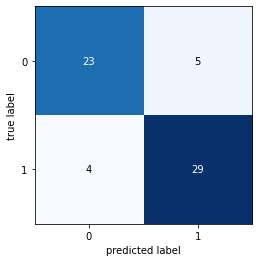

In [142]:
#plotting the confusion matrix
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm) #provide the variable we used to store the confusion matrix
plt.show()

In [145]:
# Classification Report
from sklearn.metrics import classification_report
print("Report : ", classification_report(y_te, y_pred))

Report :                precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

